In [ ]:
# To implement the Linear Regression algorithm.
# In the current automotive market, both buyers and sellers face challenges in determining the fair market value of used cars. Various factors such as the car's age, make, model, mileage, condition, and other features significantly impact its resale value. To facilitate informed decision-making and enhance transparency in the used car market, there is a need for an accurate predictive model that can estimate the price of a used car based on its attributes. Design & develop a machine learning model to predict the selling price of the car.
# • Perform the EDA.
# • Implement linear regression.
# • Evaluate the performance using MAE, MSE, RMSE, R2Score,
# • Show the Visualization.
# • Apply hyper parameter tuning to improve performance.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)
df = pd.read_csv(f'{path}/car data.csv')

Using Colab cache for faster access to the 'vehicle-dataset-from-cardekho' dataset.
Path to dataset files: /kaggle/input/vehicle-dataset-from-cardekho


In [ ]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [ ]:
df.tail(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
299,city,2017,11.5,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.3,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(299, 9)

In [ ]:
print(df['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


In [ ]:
print(df['Seller_Type'].value_counts())

Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64


In [ ]:
print(df['Transmission'].value_counts())

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [ ]:
fuel_type=df['Fuel_Type']
seller_type=df['Seller_Type']
transmission=df['Transmission']
selling_price=df['Selling_Price']

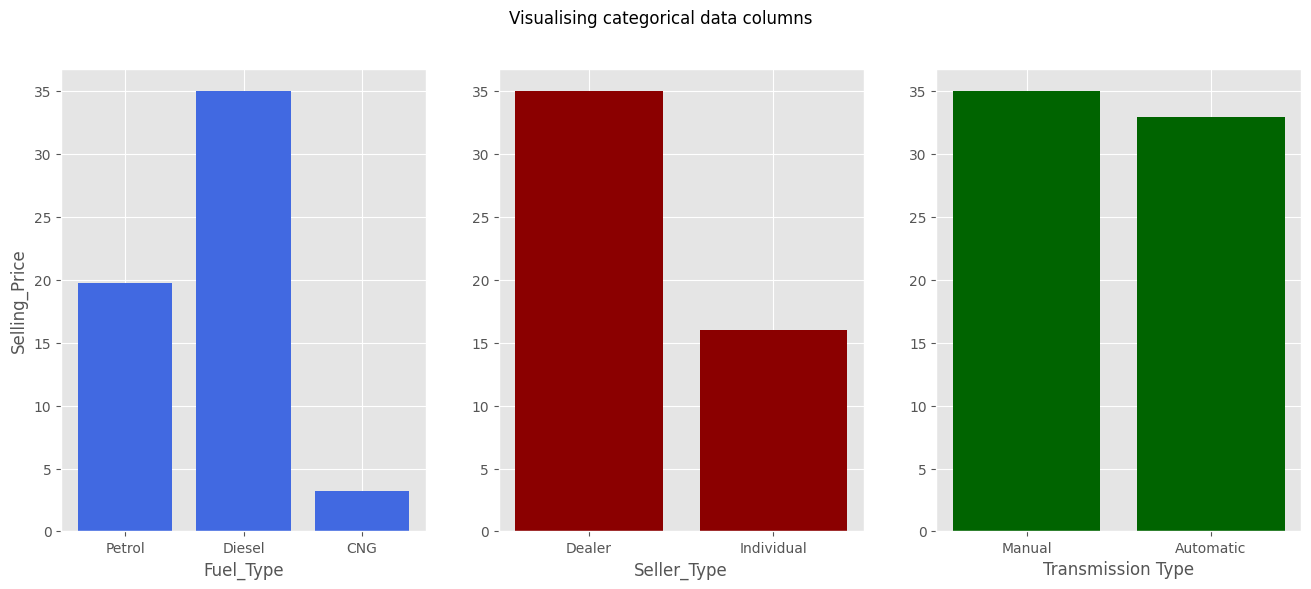

In [ ]:
style.use('ggplot')
fig=plt.figure(figsize=(16,6))
fig.suptitle('Visualising categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price,color='royalblue')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color='darkred')
plt.xlabel('Seller_Type')

plt.subplot(1,3,3)
plt.bar(transmission,selling_price,color='darkgreen')
plt.xlabel('Transmission Type')

plt.show()

In [ ]:
petrol_data=df.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [ ]:
petrol_data=df.groupby('Seller_Type').get_group('Dealer')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,193.000000,193.000000,193.000000,193.000000,193.000000
mean,2013.694301,6.632021,10.784611,39833.036269,0.020725
std,2.693514,5.025980,8.736521,24988.504632,0.142834
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.400000,21780.000000,0.000000
50%,2014.000000,5.250000,8.400000,39000.000000,0.000000
75%,2016.000000,7.500000,13.460000,52132.000000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df=pd.get_dummies(df,columns=['Seller_Type','Transmission'],drop_first=True)

/tmp/ipython-input-34781496.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,False,True
1,sx4,2013,4.75,9.54,43000,1,0,False,True
2,ciaz,2017,7.25,9.85,6900,0,0,False,True
3,wagon r,2011,2.85,4.15,5200,0,0,False,True
4,swift,2014,4.60,6.87,42450,1,0,False,True


In [ ]:
df=df.drop(['Car_Name'],axis=1)

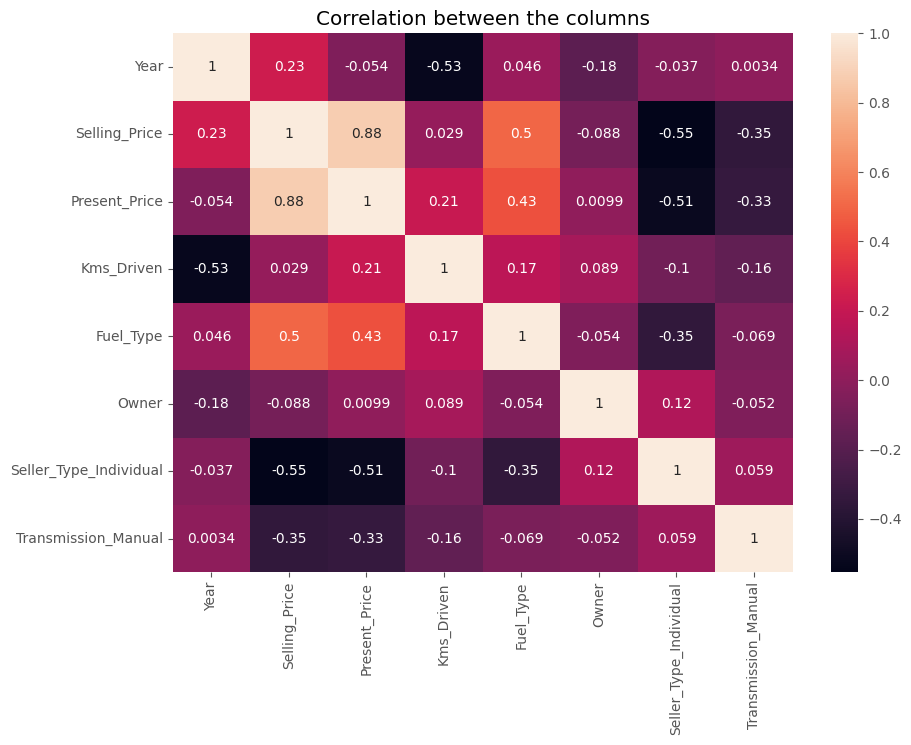

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

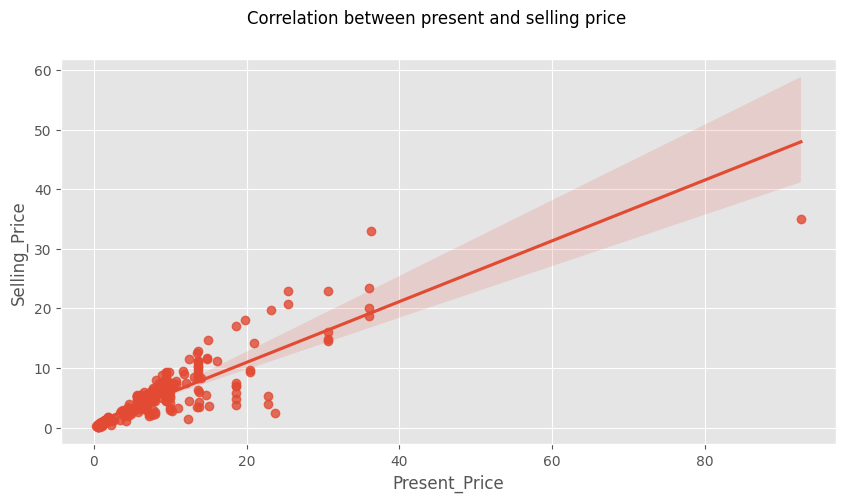

In [ ]:
fig=plt.figure(figsize=(10,5))
fig.suptitle('Correlation between present and selling price')
sns.regplot(x='Present_Price',y='Selling_Price',data=df)


In [ ]:
X=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']

In [ ]:
print("Shape of X is:",X.shape)
print("Shape of y is",y.shape)

Shape of X is: (299, 7)
Shape of y is (299,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print("X_test shape:",X_test.shape)
print("X_train shape:",X_train.shape)
print("y_test shape:",y_test.shape)
print("y_train shape:",y_train.shape)

X_test shape: (90, 7)
X_train shape: (209, 7)
y_test shape: (90,)
y_train shape: (209,)


In [ ]:
scaler=StandardScaler()


In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#create the model
model=LinearRegression()
#Fit the model(training)
model.fit(X_train,y_train)
#Predict using test data
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
from sklearn import metrics

In [ ]:
print("MAE: ",(metrics.mean_absolute_error(pred,y_test)))
print("MSE: ",(metrics.mean_squared_error(pred,y_test)))
print("R2 Score: ",(metrics.r2_score(pred,y_test)))

MAE:  1.4175215185057277
MSE:  5.407475337775115
R2 Score:  0.6889299173568583


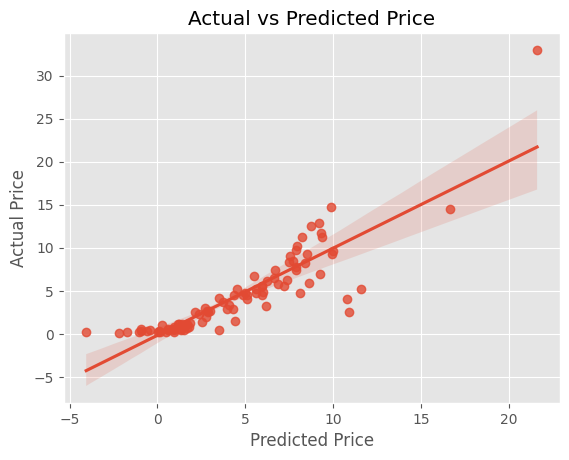

In [ ]:
sns.regplot(x=pred,y=y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title("Actual vs Predicted Price")
plt.show()

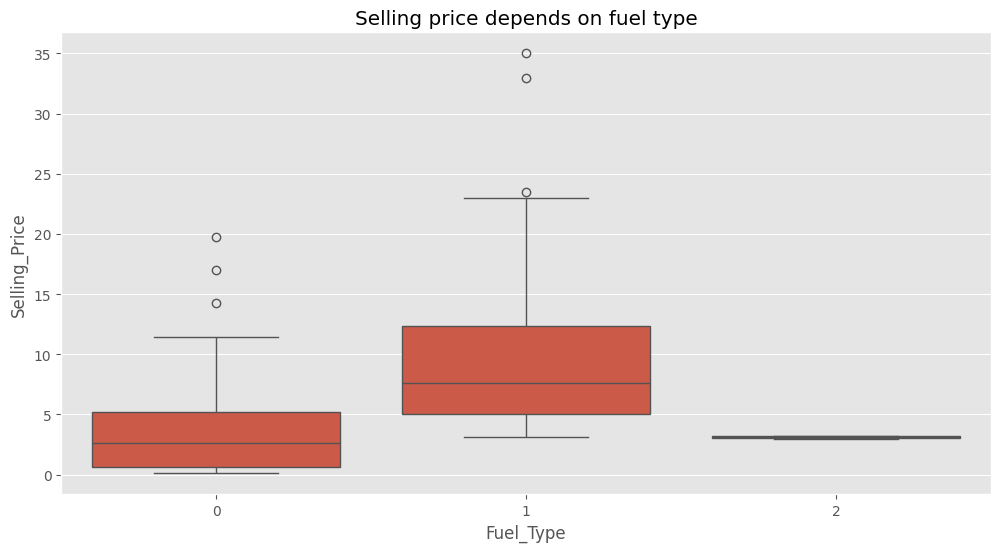

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Fuel_Type',y='Selling_Price',data=df)
plt.title('Selling price depends on fuel type')
plt.show()

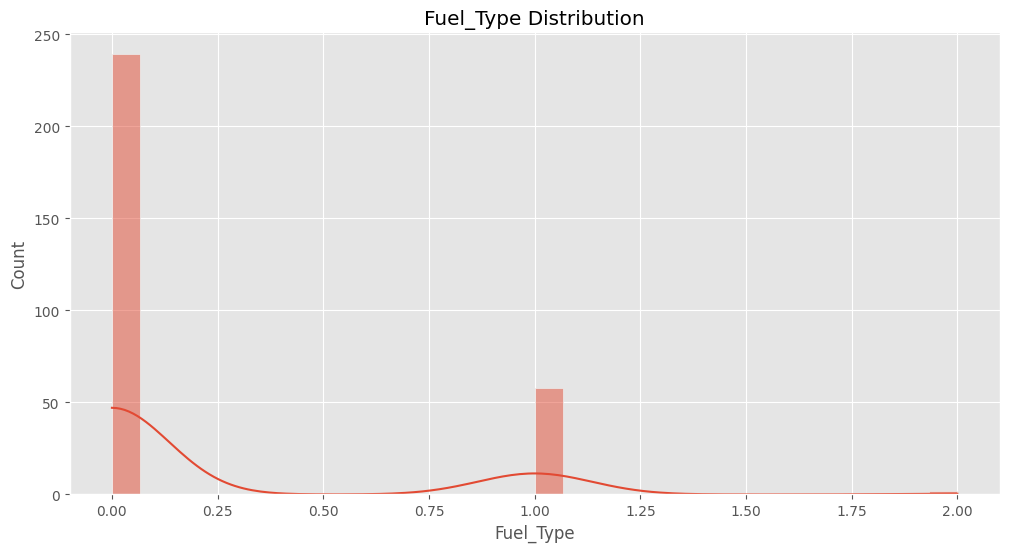

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['Fuel_Type'],bins=30,kde=True)
plt.title("Fuel_Type Distribution")
plt.show()

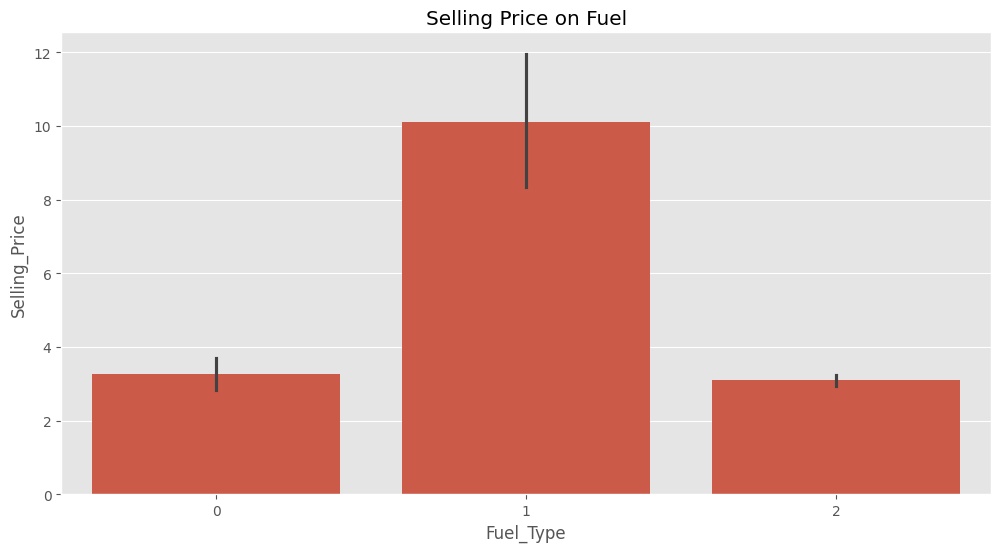

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df)
plt.title("Selling Price on Fuel")
plt.show()

In [ ]:
def detect_outliers_iqr(data,column):
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=data[(data[column]<lower_bound) | (data[column]>upper_bound)]
  return outliers
outliers_Fuel_Type=detect_outliers_iqr(df,'Fuel_Type')
print("Ouliers in Fuel_Type:",len(outliers_Fuel_Type))

Ouliers in Fuel_Type: 60


In [ ]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [ ]:
def remove_outliers_iqr(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  return data[(data[column]>=lower_bound) & (data[column]<=upper_bound)]

df_cleaned = remove_outliers_iqr(df, 'Fuel_Type')
print("New shape after removing outliers from Fuel_Type:",df_cleaned.shape)

New shape after removing outliers from Fuel_Type: (239, 8)


Hyperparameters
(GridSearchCV or RandomizeSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lr=LinearRegression()

In [ ]:
#define hyperparameter grid
param_grid={
    'fit_intercept':[True,False],
    'positive':[True,False]
}

In [ ]:
#grid search
grid_search=GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

In [ ]:
#fit model
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2', verbose=2)

In [ ]:
best_lr_model=grid_search.best_estimator_
y_pred=best_lr_model.predict(X_test)

In [ ]:
print("Best Parameters:",grid_search.best_params_)
print("MAE :",mean_absolute_error(y_test,y_pred))
print("MSE :",mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score :",r2_score(y_test,y_pred))

Best Parameters: {'fit_intercept': True, 'positive': False}
MAE : 1.4175215185057277
MSE : 5.407475337775115
RMSE : 2.325397888055959
R2 Score : 0.7674245157992123
